In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import ifft, fft, fftfreq, fftshift, ifft2, fft2
from scipy.io import wavfile
from scipy.io import loadmat
from audio_function import plot1, plot1_f, mean_data_sep,  corr_t, corr_f, cr_arr_t, norm_max, load_mat, first_second_part, filt_freq, t_arr_for_corr_t, RMS

Данные загружены


In [2]:
octave_boundaries = np.array([71, 89, 112, 141, 179, 224, 281, 355, 447, 561, 710, 895, 1120, 1410, 1790, 2240, 2810, 3550, 4470, 5610, 7100, 8950, 11200])
lower_bounds = octave_boundaries[:-1]
upper_bounds = octave_boundaries[1:]
center_freqs = np.array([80, 100, 125, 160, 200, 250, 315, 400, 500, 630, 800, 1000, 1250, 1600, 2000, 2500, 3150, 4000, 5000, 6300, 8000, 10000])  # Центральные частоты как середина диапазона


In [ ]:
amp_standard_23 = np.array([55, 53, 53, 54, 55, 55, 57, 58, 59, 58, 59 ,60, 61, 62, 61, 60, 60, 60, 59, 58, 55, 54])
amp_standard_self = np.array([12.5, 12, 11, 10, 9, 8.5, 7.5, 6.5, 5, 4.5, 4, 4.5, 3.5, 3, 3, 3, 2.5, 2.5, 2.5, 2, 2, 1])

fs, data_23 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/PGD_camera/TASCAM_0023S1.wav')
fs, data_30 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/PGD_camera/TASCAM_0030S1.wav')


amplitudes = []
for f1, f2 in zip(lower_bounds, upper_bounds):
    amp = RMS(data_23, f1, f2)
    amplitudes.append(amp)

amplitudes_norm = np.array(amplitudes) / 2e-5

amp_standard_23_pa = 10**(amp_standard_23 / 20) 

k = amp_standard_23_pa / amplitudes_norm


amplitudes_calibrated = []
for f1, f2 in zip(lower_bounds, upper_bounds):
    ampl = RMS(data_30, f1, f2)
    amplitudes_calibrated.append(ampl)

amplitudes_norm_calibrated = np.array(amplitudes_calibrated) / 2e-5 * k
amplitudes_norm_calibrated_db_23 = 20 * np.log10(amplitudes_norm_calibrated) 

/Users/bogda/Desktop/Acoustics/Scientific/Python/audio_function.py:145: ComplexWarning: Casting complex values to real discards the imaginary part
  array_f[f_int_1] = data_f[f_int_1]


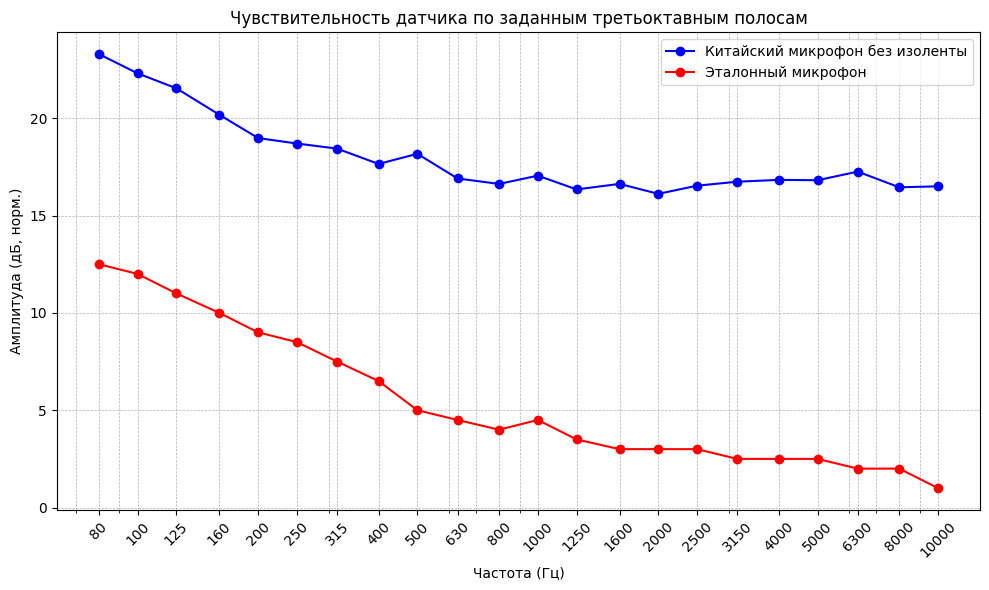

In [ ]:
plt.figure(figsize=(10, 6))
plt.semilogx(center_freqs, amplitudes_norm_calibrated_db_23, marker='o', color='blue', label='Китайский микрофон без изоленты')
plt.semilogx(center_freqs, amp_standard_self, marker='o', color='red', label='Эталонный микрофон')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда (дБ, норм.)')
plt.title('Чувствительность датчика по заданным третьоктавным полосам')
plt.xticks(center_freqs, [f"{int(f)}" for f in center_freqs], rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

Необходимо использовать данные с эталона:
Берем данные с эталона и мы знаем, что это точно децибеллы, переводим это в паскали и мы точно знаем поле. Используя это переводим наши условнные единицы с китайских микрофонов в децибеллы.


In [ ]:
amp_standard_24 = np.array([55, 53, 54, 54, 57, 57, 57, 58, 59, 58, 59 , 60, 61, 62, 61, 60, 60, 60, 59, 58, 55, 54])

fs, data_24 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/PGD_camera/TASCAM_0024S1.wav')
fs, data_29 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/PGD_camera/TASCAM_0029S1.wav')


amplitudes = []
for f1, f2 in zip(lower_bounds, upper_bounds):
    amp = RMS(data_24, f1, f2)
    amplitudes.append(amp)

amplitudes_norm = np.array(amplitudes) / 2e-5

amp_standard_24_pa = 10**(amp_standard_24 / 20) 

k = amp_standard_24_pa / amplitudes_norm


amplitudes_calibrated = []
for f1, f2 in zip(lower_bounds, upper_bounds):
    ampl = RMS(data_29, f1, f2)
    amplitudes_calibrated.append(ampl)

amplitudes_norm_calibrated = np.array(amplitudes_calibrated) / 2e-5 * k
amplitudes_norm_calibrated_db_24 = 20 * np.log10(amplitudes_norm_calibrated) 

/Users/bogda/Desktop/Acoustics/Scientific/Python/audio_function.py:145: ComplexWarning: Casting complex values to real discards the imaginary part
  array_f[f_int_1] = data_f[f_int_1]


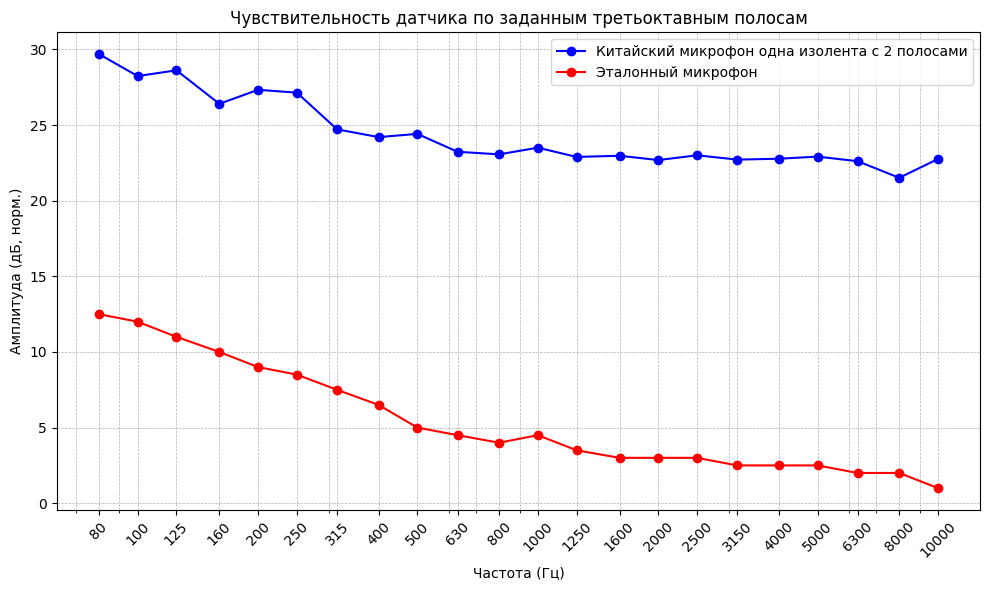

In [ ]:
plt.figure(figsize=(10, 6))
plt.semilogx(center_freqs, amplitudes_norm_calibrated_db_24, marker='o', color='blue', label='Китайский микрофон одна изолента с 2 полосами')
plt.semilogx(center_freqs, amp_standard_self, marker='o', color='red', label='Эталонный микрофон')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда (дБ, норм.)')
plt.title('Чувствительность датчика по заданным третьоктавным полосам')
plt.xticks(center_freqs, [f"{int(f)}" for f in center_freqs], rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

In [ ]:
amp_standard_25 = np.array([55, 54, 54, 55, 55, 57, 57, 58, 59, 58, 59 ,60, 61, 62, 61, 60, 60, 60, 59, 58, 55, 54])


fs, data_25 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/PGD_camera/TASCAM_0025S1.wav')
fs, data_28 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/PGD_camera/TASCAM_0028S1.wav')


amplitudes = []
for f1, f2 in zip(lower_bounds, upper_bounds):
    amp = RMS(data_25, f1, f2)
    amplitudes.append(amp)

amplitudes_norm = np.array(amplitudes) / 2e-5

amp_standard_25_pa = 10**(amp_standard_25 / 20) 

k = amp_standard_25_pa / amplitudes_norm


amplitudes_calibrated = []
for f1, f2 in zip(lower_bounds, upper_bounds):
    ampl = RMS(data_28, f1, f2)
    amplitudes_calibrated.append(ampl)

amplitudes_norm_calibrated = np.array(amplitudes_calibrated) / 2e-5 * k
amplitudes_norm_calibrated_db_25 = 20 * np.log10(amplitudes_norm_calibrated) 

/Users/bogda/Desktop/Acoustics/Scientific/Python/audio_function.py:145: ComplexWarning: Casting complex values to real discards the imaginary part
  array_f[f_int_1] = data_f[f_int_1]


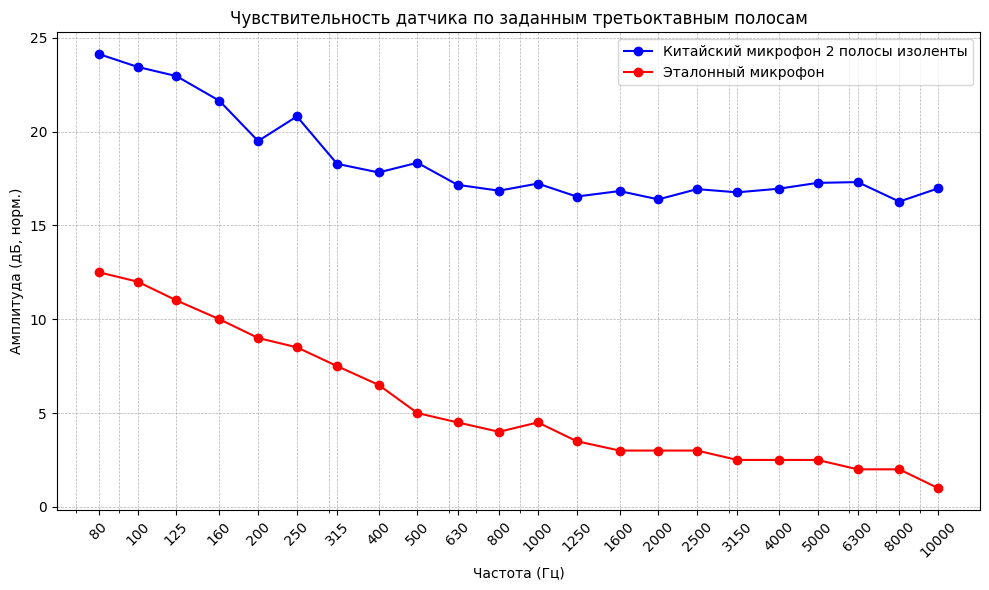

In [ ]:
plt.figure(figsize=(10, 6))
plt.semilogx(center_freqs, amplitudes_norm_calibrated_db_25, marker='o', color='blue', label='Китайский микрофон 2 полосы изоленты')
plt.semilogx(center_freqs, amp_standard_self, marker='o', color='red', label='Эталонный микрофон')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда (дБ, норм.)')
plt.title('Чувствительность датчика по заданным третьоктавным полосам')
plt.xticks(center_freqs, [f"{int(f)}" for f in center_freqs], rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

In [ ]:
amp_standard_26 = np.array([55, 54, 54, 55, 55, 57, 57, 58, 59, 58, 59 ,60, 61, 62, 61, 60, 60, 60, 59, 58, 55, 54])


fs, data_26 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/PGD_camera/TASCAM_0026S1.wav')
fs, data_27 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/PGD_camera/TASCAM_0027S1.wav')


amplitudes = []
for f1, f2 in zip(lower_bounds, upper_bounds):
    amp = RMS(data_26, f1, f2)
    amplitudes.append(amp)

amplitudes_norm = np.array(amplitudes) / 2e-5

amp_standard_26_pa = 10**(amp_standard_26 / 20) 

k = amp_standard_26_pa / amplitudes_norm


amplitudes_calibrated = []
for f1, f2 in zip(lower_bounds, upper_bounds):
    ampl = RMS(data_27, f1, f2)
    amplitudes_calibrated.append(ampl)

amplitudes_norm_calibrated = np.array(amplitudes_calibrated) / 2e-5 * k
amplitudes_norm_calibrated_db_26 = 20 * np.log10(amplitudes_norm_calibrated) 

/Users/bogda/Desktop/Acoustics/Scientific/Python/audio_function.py:145: ComplexWarning: Casting complex values to real discards the imaginary part
  array_f[f_int_1] = data_f[f_int_1]


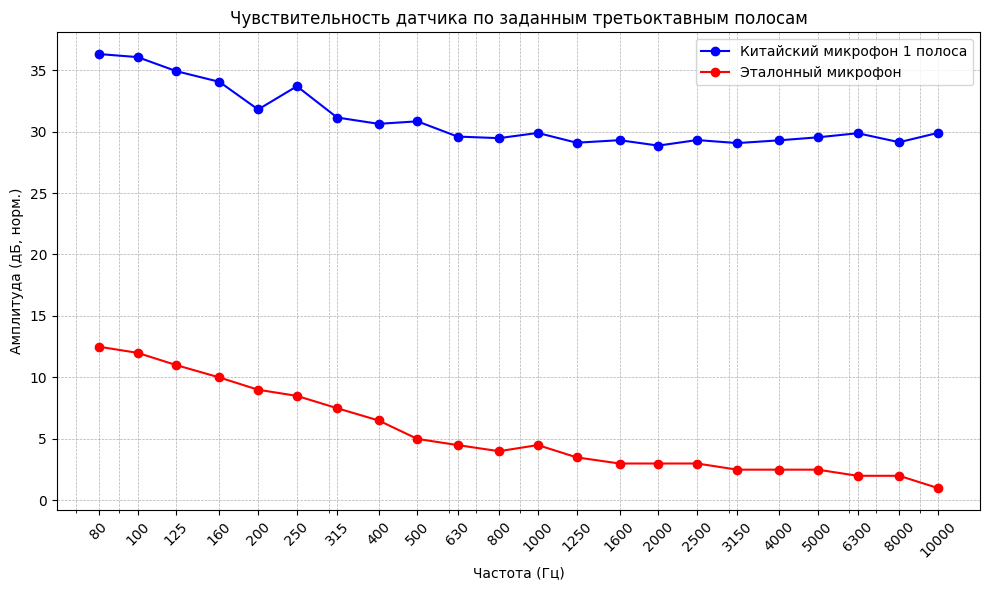

In [ ]:
plt.figure(figsize=(10, 6))
plt.semilogx(center_freqs, amplitudes_norm_calibrated_db_26, marker='o', color='blue', label='Китайский микрофон 1 полоса')
plt.semilogx(center_freqs, amp_standard_self, marker='o', color='red', label='Эталонный микрофон')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда (дБ, норм.)')
plt.title('Чувствительность датчика по заданным третьоктавным полосам')
plt.xticks(center_freqs, [f"{int(f)}" for f in center_freqs], rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

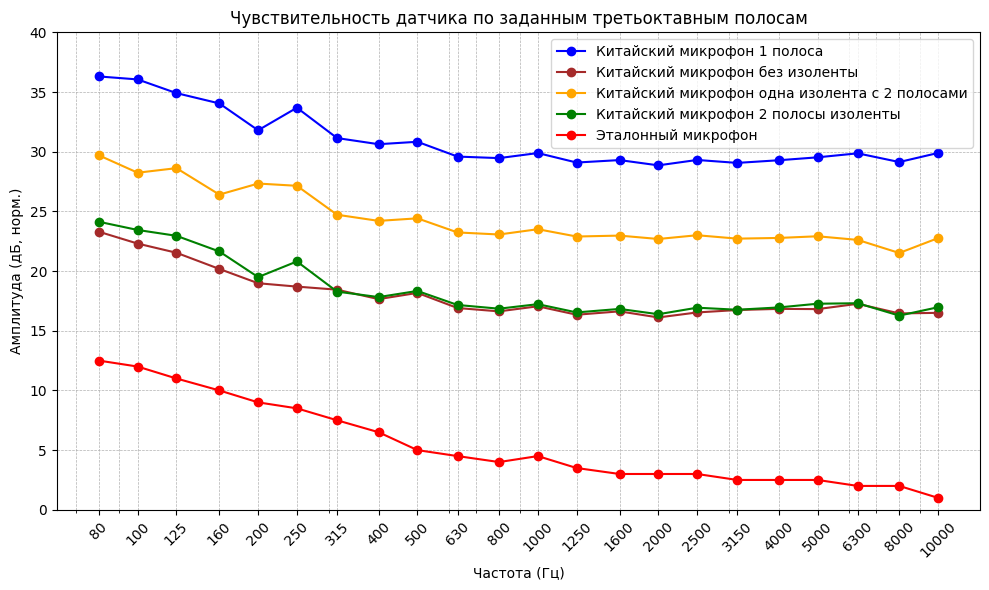

In [ ]:
plt.figure(figsize=(10, 6))
plt.semilogx(center_freqs, amplitudes_norm_calibrated_db_26, marker='o', color='blue', label='Китайский микрофон 1 полоса')
plt.semilogx(center_freqs, amplitudes_norm_calibrated_db_23, marker='o', color='brown', label='Китайский микрофон без изоленты')
plt.semilogx(center_freqs, amplitudes_norm_calibrated_db_24, marker='o', color='orange', label='Китайский микрофон одна изолента с 2 полосами')
plt.semilogx(center_freqs, amplitudes_norm_calibrated_db_25, marker='o', color='green', label='Китайский микрофон 2 полосы изоленты')
plt.semilogx(center_freqs, amp_standard_self, marker='o', color='red', label='Эталонный микрофон')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.ylim(0, 40)
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда (дБ, норм.)')
plt.title('Чувствительность датчика по заданным третьоктавным полосам')
plt.xticks(center_freqs, [f"{int(f)}" for f in center_freqs], rotation=45)
plt.tight_layout()
plt.legend()
plt.show()